In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

#Importação e visão geral dos dados

In [2]:
df = pd.read_csv('Churn.csv',sep=';')
df.head(n=4)

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0


In [3]:
df.shape

(999, 12)

In [4]:
df.columns= ["ID","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","temCartCredito","Ativo","Salario","Saiu"]

In [5]:
df.columns

Index(['ID', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo',
       'Produtos', 'temCartCredito', 'Ativo', 'Salario', 'Saiu'],
      dtype='object')

In [6]:
df.isna().sum()

ID                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

#Score

In [7]:
df['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


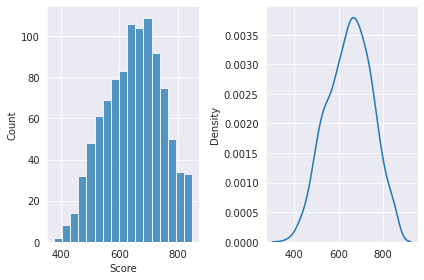

In [8]:
plt.figure()
plt.subplot(1,2,1)
sns.histplot(df['Score'])
plt.subplot(1,2,2)
sns.distplot(df['Score'].values,hist=False)
plt.tight_layout()
plt.show()

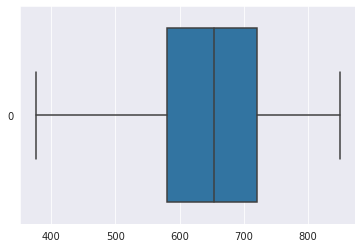

In [9]:
sns.boxplot(data=df['Score'].values,orient='h')

Não há outliers nem outros claros indicadores de que existe um problema com os dados de 'Score'

#Gênero

In [10]:
df.groupby('Genero').size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Vemos que existem mais de uma string relacionadas ao mesmo gênero

In [11]:
df.loc[df['Genero'].isin(['F','Fem']),'Genero'] = 'Feminino'

In [12]:
df.groupby('Genero').size()

Genero
Feminino     464
M              6
Masculino    521
dtype: int64

In [13]:
df.loc[df['Genero']=='M','Genero']='Masculino'

In [14]:
df.groupby('Genero').size()

Genero
Feminino     464
Masculino    527
dtype: int64

In [15]:
df['Genero'].fillna(value=sts.mode(df['Genero']),inplace=True)

In [16]:
df['Genero'].isna().sum()

0

#Estado

In [17]:
df.groupby('Estado').size()

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [18]:
df.loc[df['Estado']=='RP','Estado'] = 'PR'
df.loc[df['Estado'].isin(['SP','TD']),'Estado'] = 'RS'

In [19]:
df.groupby('Estado').size()

Estado
PR    258
RS    483
SC    258
dtype: int64

Text(0.5, 1.0, 'Clientes por estado')

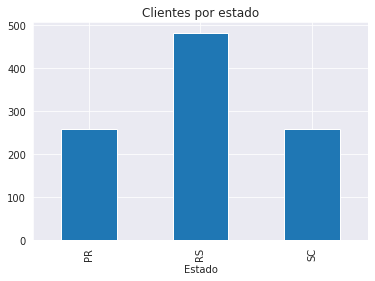

In [20]:
df.groupby('Estado').size().plot.bar().set_title('Clientes por estado')

#Idade

In [21]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Vemos que há indícios de problema com os valores em 'Idade'.

Text(0.5, 1.0, 'Idade')

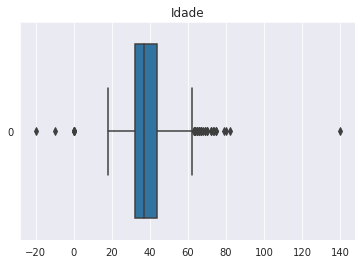

In [22]:
sns.boxplot(data=df['Idade'].values,orient='h').set_title('Idade')

Consideremos que as idades válidas estejam entre 0 e 100 anos

In [23]:
medianaIdade = sts.median(df['Idade'].values)
print('Mediana das idades:',medianaIdade)

Mediana das idades: 37


In [24]:
df.loc[df['Idade'] > 100,'Idade'] = medianaIdade
df.loc[df['Idade'] < 0,'Idade'] = medianaIdade

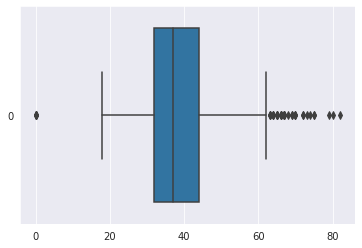

In [25]:
sns.boxplot(data=df['Idade'].values,orient='h')

Text(0.5, 1.0, 'Idades')

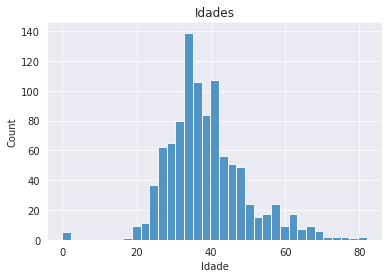

In [26]:
sns.histplot(data=df['Idade']).set_title('Idades')

#Patrimônio

In [27]:
df['Patrimonio'].value_counts()

2     110
9     110
8     108
1     104
3     103
5     100
7      95
6      94
4      87
10     50
0      38
Name: Patrimonio, dtype: int64

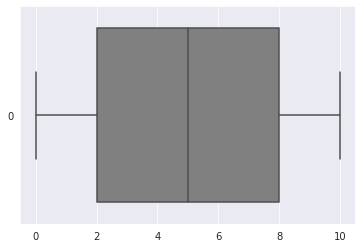

In [28]:
sns.boxplot(data=df['Patrimonio'].values,orient='h',color='grey')

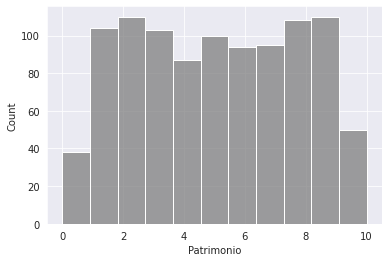

In [29]:
sns.histplot(data=df['Patrimonio'],color='grey')

#Saldo

In [30]:
df['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

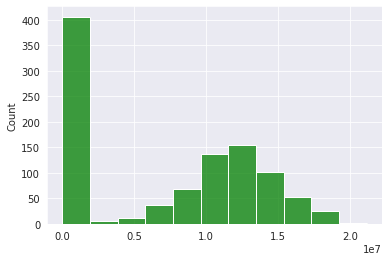

In [31]:
sns.histplot(data=df['Saldo'].values,color='green')

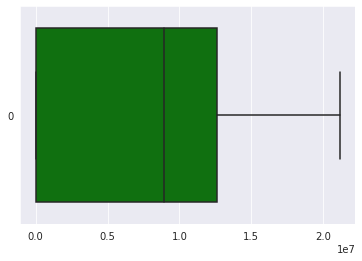

In [32]:
sns.boxplot(data=df['Saldo'].values,orient='h',color='green')

Vemos que 'Saldo' parece normal, não há outliers. Apenas um cenário onde há muitos clientes com saldo = 0

#Produtos

In [33]:
df['Produtos'].describe()

count    999.000000
mean       1.526527
std        0.574201
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Produtos, dtype: float64

In [34]:
df.groupby('Produtos').size()

Produtos
1    511
2    452
3     34
4      2
dtype: int64

#Cartão de crédito

In [35]:
df.groupby('temCartCredito').size()

temCartCredito
0    297
1    702
dtype: int64

#Ativo

In [36]:
df.groupby('Ativo').size()

Ativo
0    490
1    509
dtype: int64

#Salario

In [37]:
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [38]:
df['Salario'].isna().sum()

7

In [39]:
medianaSalario = sts.median(df['Salario'].values)
print('Mediana de salários: ',medianaSalario)

Mediana de salários:  70518.0


In [40]:
df.loc[df['Salario'].isna()]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
17,18,549,SC,Feminino,24,9,0,2,1,1,NaN,0
52,53,788,RS,Feminino,33,5,0,2,0,0,NaN,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,NaN,1
330,332,656,RS,Masculino,50,7,0,2,0,1,NaN,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,NaN,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,NaN,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,NaN,1


In [41]:
df['Salario'].fillna(medianaSalario,inplace=True)

In [42]:
df['Salario'].isna().sum()

0

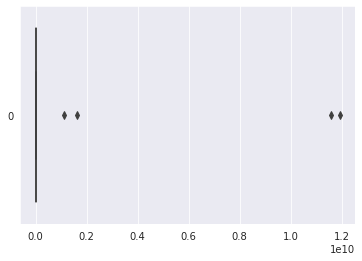

In [43]:
sns.boxplot(data=df['Salario'].values,orient='h')

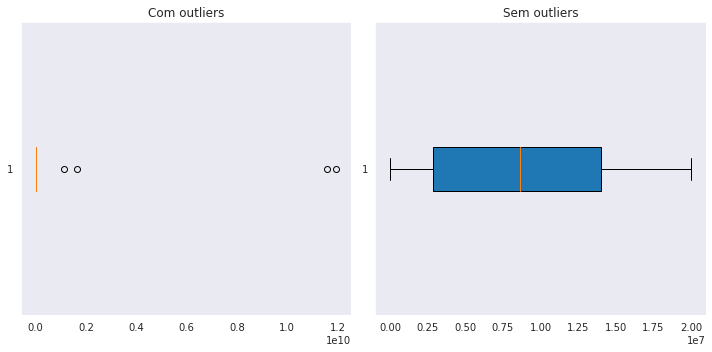

In [44]:
plt.rcParams['figure.figsize'] = (10,5)
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(df['Salario'],patch_artist=True,vert=False)
plt.title('Com outliers')
plt.grid()
plt.subplot(1,2,2)
plt.boxplot(df.Salario,patch_artist=True,vert=False,showfliers=False)
plt.title('Sem outliers')
plt.grid()
plt.tight_layout()
plt.show()

Vamos buscar por estes OUTLIERS 

In [45]:
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)

intervalQT = Q3-Q1

print('distância interquartil: ',intervalQT)

distância interquartil:  11173055.0


In [46]:
df[df['Salario'] > Q3 + (1.5*intervalQT)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [47]:
df.loc[df['Salario'] > Q3 + (1.5*intervalQT),'Salario'] = medianaSalario

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


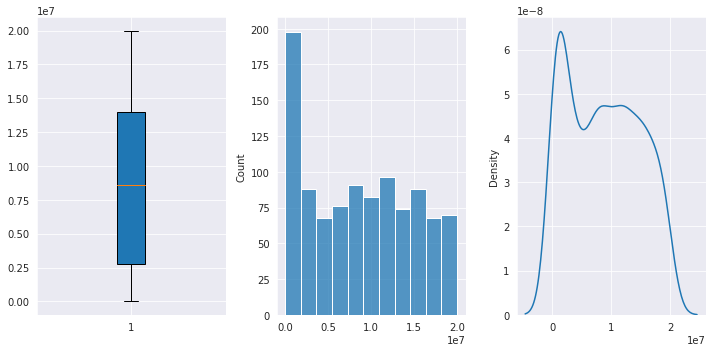

In [48]:
plt.figure()
plt.subplot(1,3,1)
plt.boxplot(df['Salario'].values,patch_artist=True,vert=True,showfliers=True)
plt.subplot(1,3,2)
sns.histplot(data=df['Salario'].values)
plt.subplot(1,3,3)
sns.distplot(df['Salario'].values,hist=False)
plt.tight_layout()
plt.show()

In [49]:
df['Salario'].describe()

count    9.990000e+02
mean     8.756344e+06
std      6.093884e+06
min      9.677000e+03
25%      2.779068e+06
50%      8.574652e+06
75%      1.395180e+07
max      1.997254e+07
Name: Salario, dtype: float64

In [50]:
df.isna().sum()

ID                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

#Correlação entre atributos

In [51]:
df2 = df.loc[:,['Score','Idade','Patrimonio','Saldo','Produtos','temCartCredito','Ativo','Salario']]

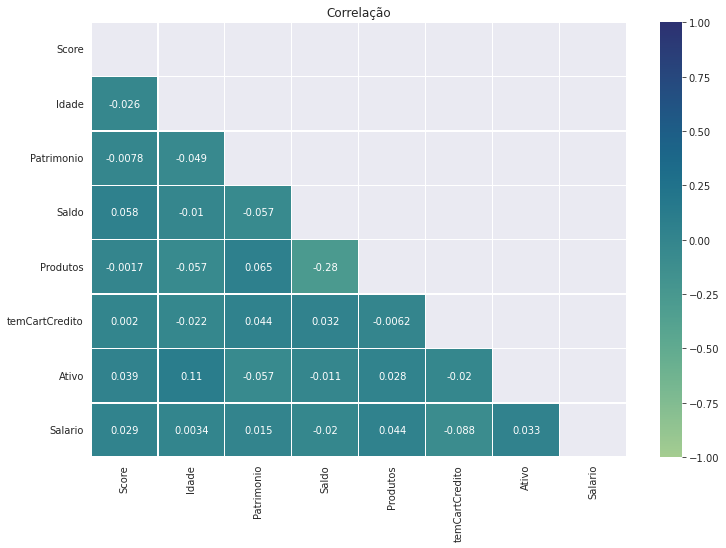

In [52]:
n = df2.columns.shape[0]

mask = np.ones((n,n))
mask = np.tril(mask,-1)
mask = (mask==0)

hm = sns.heatmap(df2.corr(),vmin=-1,vmax=1,cmap="crest",
                 annot=True,linewidths=0.5,mask=mask).set_title('Correlação')

hm.figure.set_size_inches(12,8)

Não vemos indícios de correlação forte ou moderada entre dois atributos.

#Ajuste dos dados para criação do modelo

In [53]:
from sklearn.model_selection import train_test_split #importação da função que irá realizar a partilha dos dados
from sklearn import preprocessing

In [54]:
df.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Vamos criar um encoding para "Genero", um encoding para "Estado" e padronizar os valores de Saldo e Salario, que mostram alta magnitude.

In [55]:
encoderGenero = preprocessing.LabelEncoder() #instanciação do objeto 

In [56]:
encoderGenero.fit(['Masculino','Feminino'])

LabelEncoder()

In [57]:
encoderGenero.classes_

array(['Feminino', 'Masculino'], dtype='<U9')

In [58]:
df['Genero'] = encoderGenero.transform(df.Genero)

In [59]:
df.head(n=2)

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,619,RS,0,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,0,41,1,8380786,1,0,1,11254258.0,0


Encoding de "Estado"

In [60]:
encoderEstado = preprocessing.LabelEncoder()

encoderEstado.fit(np.unique(df['Estado'].values))

LabelEncoder()

In [61]:
print('Classes:',encoderEstado.classes_)

Classes: ['PR' 'RS' 'SC']


In [62]:
df['Estado'] = encoderEstado.transform(df['Estado'].values)

Padronizando 'Salario'

In [63]:
stdSalario = preprocessing.StandardScaler()

stdSalario.fit(df['Salario'].values.reshape(-1,1)) #utlizando reshape pois StScaler recebe um vetor coluna

StandardScaler()

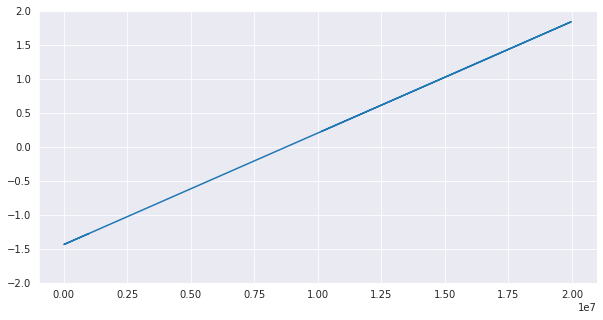

In [64]:
plt.figure()
plt.plot(df['Salario'].values,stdSalario.transform(df['Salario'].values.reshape(-1,1)))
plt.ylim([-2,2])
plt.grid(True)

In [65]:
df['Salario'] = stdSalario.transform(df['Salario'].values.reshape(-1,1))

In [66]:
print('Máximo :',df['Salario'].max(),' | Mínimo: ',df['Salario'].min())

Máximo : 1.8414879962496509  | Mínimo:  -1.4360378674759682


Padronizando 'Saldo'

In [67]:
stdSaldo = preprocessing.StandardScaler()

stdSaldo.fit(df['Saldo'].values.reshape(-1,1))

StandardScaler()

In [68]:
df['Saldo'] = stdSaldo.transform(df['Saldo'].values.reshape(-1,1))
print('Máximo: ',df['Saldo'].max(),' | Mínimo: ',df['Saldo'].min())

Máximo:  2.2211465579810885  | Mínimo:  -1.1357252664767583


Score

In [69]:
stdScore = preprocessing.StandardScaler()

stdScore.fit(df['Score'].values.reshape(-1,1))

StandardScaler()

In [70]:
df['Score'] = stdScore.transform(df['Score'].values.reshape(-1,1))

Idade

In [71]:
stdIdade = preprocessing.StandardScaler()

stdIdade.fit(df['Idade'].values.reshape(-1,1))

StandardScaler()

In [72]:
df['Idade'] = stdIdade.transform(df['Idade'].values.reshape(-1,1))

In [73]:
df.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,-0.301600,1,0,0.290248,2,-1.135725,1,1,1,0.226331,1
1,2,-0.413599,2,0,0.196501,1,0.192728,1,0,1,0.410110,0
2,3,-1.492863,1,0,0.290248,8,-0.882644,3,1,0,0.432915,1
3,4,0.512940,1,0,0.009009,1,-1.135725,2,0,0,0.102830,0
4,5,2.050383,2,0,0.383994,2,0.853769,1,1,1,-1.307785,0


#**Criando o modelo de Regressão Logística para predizer se um determinado cliente irá sair ou não.**

**Com uso da Implementação de LogisticRegression da biblioteca sklearn**

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [75]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [76]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,
                                                     test_size = 0.3,
                                                     random_state=0)

In [77]:
model = LogisticRegression()
model.fit(X_treino,y_treino)

LogisticRegression()

In [78]:
print('Coeficientes da função logística: \n\n',model.coef_)

Coeficientes da função logística: 

 [[-0.16930424 -0.07439189 -0.74434371  1.02062999 -0.02283383  0.27118268
  -0.06225327 -0.11533648 -1.44015854  0.01599617]]


In [79]:
print('frequência de acerto: ',model.score(X_teste,y_teste))

frequência de acerto:  0.8


In [80]:
previsoes = model.predict(X_teste)

Plotagem da matriz de confusão

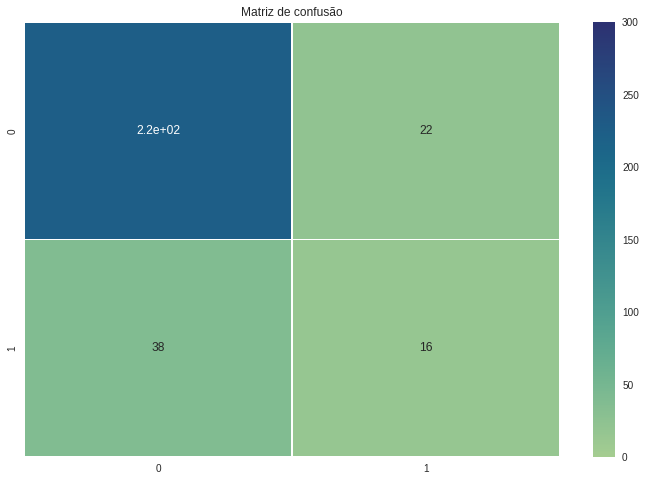

In [81]:
matrizConfusao = confusion_matrix(y_teste,previsoes)

confM = sns.heatmap(matrizConfusao, vmin = 0, 
            vmax = y_teste.shape[0], 
            annot=True, cmap="crest", 
            linewidths=0.5).set_title('Matriz de confusão')

confM.figure.set_size_inches(12,8)